In [1]:
import pickle
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
positive_histogram = {}
negative_histogram = {}

for dataset in ["aids", "mutag", "ptc_fm", "ptc_fr", "ptc_mm", "ptc_mr"]:
    with open(f"positive_histogram_{dataset}.pkl", "rb") as f:
        positive_histogram[dataset] = pickle.load(f)

    with open(f"negative_histogram_{dataset}.pkl", "rb") as f:
        negative_histogram[dataset] = pickle.load(f)

In [3]:
# latexify
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', linewidth=1)
plt.rc('font', weight='bold')

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
# matplotlib.rc('text', usetex=True)
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
# matplotlib.rcParams['text.latex.preamble']=r"\usepackage{bm} \usepackage{amsmath,amsfonts} \boldmath"

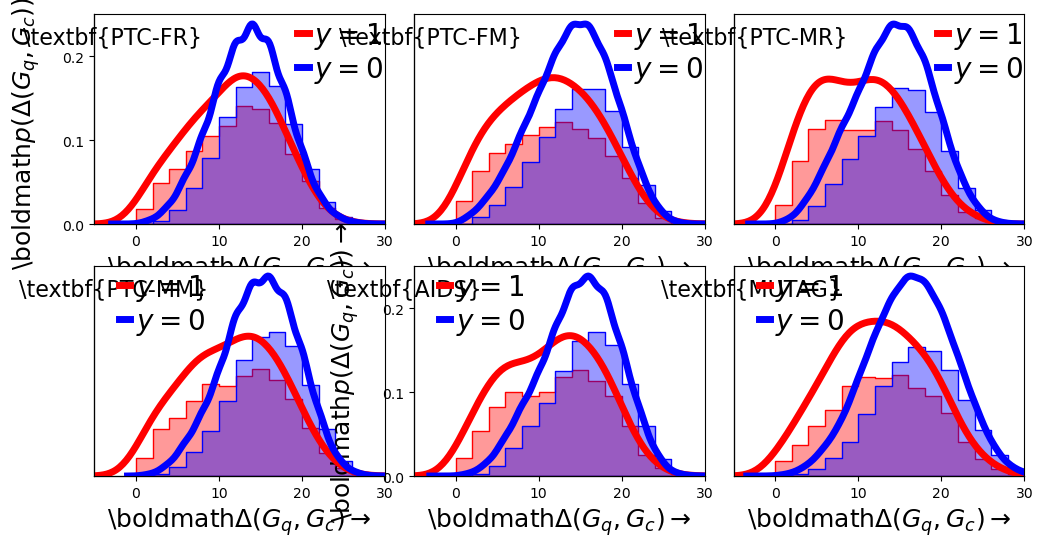

<Figure size 640x480 with 0 Axes>

In [4]:
fig, ((fr, fm, mr), (mm, aids, mutag)) = plt.subplots(2, 3, figsize=(12,6))
plt.subplots_adjust(wspace=0.1)

data_ids = {}
data_ids['aids'], data_ids['mutag'] = aids, mutag
data_ids['ptc_fr'], data_ids['ptc_fm'] = fr, fm
data_ids['ptc_mr'], data_ids['ptc_mm'] = mr, mm

latex_dataset={
    'aids':r'\textbf{AIDS}', 'mutag':r'\textbf{MUTAG}',
    'ptc_fm':r'\textbf{PTC-FM}', 'ptc_fr':r'\textbf{PTC-FR}',
    'ptc_mm':r'\textbf{PTC-MM}', 'ptc_mr':r'\textbf{PTC-MR}'
}

i = 0
for dataset in ["aids", "mutag", "ptc_fm", "ptc_fr", "ptc_mm", "ptc_mr"]:
    binwidth=2

    sns.histplot(list(map(lambda x:-1*int(x), positive_histogram[dataset])), kde=False, stat="probability", color='r', element="step", label=latex_dataset[dataset],
            binwidth=binwidth, ax=data_ids[dataset], alpha=0.4)
    sns.histplot(list(map(lambda x:-1*int(x), negative_histogram[dataset])), kde=False, stat="probability", color='b', element="step",
            binwidth=binwidth, ax=data_ids[dataset], alpha=0.4)

    data_ids[dataset].set(ylabel=None)

    if i in [0,1,2,3,4,5]:
        data_ids[dataset].set_xlim([-5,30])
        data_ids[dataset].set_xticks([0, 10, 20, 30])
        data_ids[dataset].set_xlabel(r'\boldmath$\Delta(G_q,G_c)\rightarrow$', fontsize=18)
    else:
        data_ids[dataset].set_xlim([-5,30])
        data_ids[dataset].set_xticks([])

    if i in [0, 3]:
        data_ids[dataset].set_ylim([0,.25])
        data_ids[dataset].set_yticks([.0, .1, .2])
        data_ids[dataset].set_ylabel(r'\boldmath$p(\Delta(G_q,G_c))\rightarrow$', fontsize=18,labelpad=15)
    else:
        data_ids[dataset].set_ylim([0,.25])
        data_ids[dataset].set_yticks([])

    i += 1
    ax2 = data_ids[dataset].twinx()
    ax2.axes.yaxis.set_ticks([])

    data_ids[dataset].set_ylim([0,0.25])
    ax2 = data_ids[dataset].twinx()
    ax2.axes.yaxis.set_ticks([])

    sns.kdeplot(list(map(lambda x:-1*int(x),positive_histogram[dataset])), color="r", label="$y=1$", lw=5, bw_adjust=2, ax=ax2)
    sns.kdeplot(list(map(lambda x:-1*int(x),negative_histogram[dataset])), color="b", label="$y=0$", lw=5, bw_adjust=2, ax=ax2)
    ax2.legend(bbox_to_anchor=(0, 0, 1.08, 1.09), prop={'size': 20}, frameon=False, handlelength=0.4, labelspacing=0.1, handletextpad=0.2)

    if dataset=='aids':
        leg = data_ids[dataset].legend(bbox_to_anchor=(-0.78, -0.05, 1.08, 1.09),  prop={'size': 16}, frameon=False, handlelength=0, handletextpad=-0.2)
    elif dataset in ['ptc_mr', 'ptc_mm']:
        leg = data_ids[dataset].legend(bbox_to_anchor=(-0.62, -0.05, 1.08, 1.09),  prop={'size': 16}, frameon=False, handlelength=0, handletextpad=-0.2)
    else:
        leg = data_ids[dataset].legend(bbox_to_anchor=(-0.64, -0.05, 1.08, 1.09),  prop={'size': 16}, frameon=False, handlelength=0, handletextpad=-0.2)

    for item in leg.legendHandles:
        item.set_visible(False)

    plt.box(on=True)
    data_ids[dataset].spines['top'].set_visible(True)
    data_ids[dataset].spines['right'].set_visible(True)

file = "interpretebility_histograms.pdf"
plt.show()
plt.savefig(file, bbox_inches='tight')
